## Matplotlibをインポート

matplotlibの中のpyplotを読み込みます。

また、Jupyter Notebook内にグラフを出力させるために`%matplotlib inline`を記述します。

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

**ポイント**

- `as`を使用して`plt`という名前で使用することが多いです。
- `%matplotlib inline`は通常のpyファイルで記述する場合は不要となります。

## 使用するデータを読み込む

Pythonライブラリである「Pandas」をインポートしてcsvファイルをDataFrameとして読み込みます。

使用するデータは、「1920年から2015年までの全国の人口推移のデータ」とします。

In [1]:
import pandas as pd

df = pd.read_csv('data.csv', encoding='shift-jis')
df

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
0,1,北海道,大正,9.0,1920.0,2359183,1244322,1114861
1,2,青森県,大正,9.0,1920.0,756454,381293,375161
2,3,岩手県,大正,9.0,1920.0,845540,421069,424471
3,4,宮城県,大正,9.0,1920.0,961768,485309,476459
4,5,秋田県,大正,9.0,1920.0,898537,453682,444855
...,...,...,...,...,...,...,...,...
934,43,熊本県,平成,27.0,2015.0,1786170,841046,945124
935,44,大分県,平成,27.0,2015.0,1166338,551932,614406
936,45,宮崎県,平成,27.0,2015.0,1104069,519242,584827
937,46,鹿児島県,平成,27.0,2015.0,1648177,773061,875116


私のGitHubに「data.csv」としてアップロードしてあるので、下記コマンドでダウンロードすれば簡単に準備できます。

```Shell
$ curl https://raw.githubusercontent.com/nakachan-ing/python-references/master/Pandas/data.csv -O
```

## グラフを描くためのデータを作る

データをグラフにするには、**データに対するどのような情報が必要なのか**をはっきりさせることが重要です。

今回は「1920年から2015年までの全国の人口推移のデータ」から、東京都の人口推移をグラフにすることにします。

読み込んだデータから、「都道府県名」が「東京都」のデータを取得して新たなDataFrameとして作成します。

In [2]:
population_of_tokyo = df[df['都道府県名']=='東京都']
population_of_tokyo

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
12,13,東京都,大正,9.0,1920.0,3699428,1952989,1746439
59,13,東京都,大正,14.0,1925.0,4485144,2387609,2097535
106,13,東京都,昭和,5.0,1930.0,5408678,2855323,2553355
153,13,東京都,昭和,10.0,1935.0,6369919,3325696,3044223
200,13,東京都,昭和,15.0,1940.0,7354971,3795875,3559096
247,13,東京都,昭和,20.0,1945.0,3488284,1788145,1700139
293,13,東京都,昭和,25.0,1950.0,6277500,3169389,3108111
340,13,東京都,昭和,30.0,1955.0,8037084,4115823,3921261
387,13,東京都,昭和,35.0,1960.0,9683802,4997023,4686779
434,13,東京都,昭和,40.0,1965.0,10869244,5564583,5304661


## 折れ線グラフの作成

`plt.plot()`の引数にX軸とY軸とするカラムを指定します。

`plt.show()`とすることで、グラフが作成されます。

X軸に「西暦（年）」、Y軸に「人口（総数）」を指定して、人口の推移をグラフにしてみます。

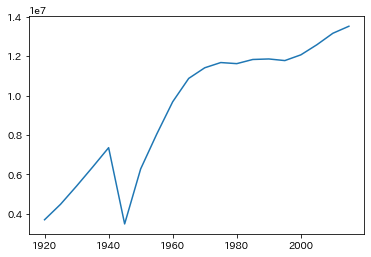

In [17]:
x = population_of_tokyo['西暦（年）']
y = population_of_tokyo['人口（総数）']

plt.plot(x, y)
plt.show()

グラフを見ると1940年から1950年の間に急激に人口が減っていることが見て分かります。（今回、原因までは考えないことにします。）

## ラベルの追加

先ほどのグラフで人口の推移を見ることはできましたが、第三者から見てX軸とY軸がそれぞれ何を示しているかひと目では分かりません。

`plt.xlabel`、`plt.ylabel`の引数に名前を指定することで、それぞれの軸にラベルを付けることが出来ます。

日本語でラベルを付ける場合、matplotlibはデフォルトでは日本語対応していないため、`japanize-matplotlib`をインストールします。

In [10]:
!pip install japanize-matplotlib

In [11]:
import japanize_matplotlib

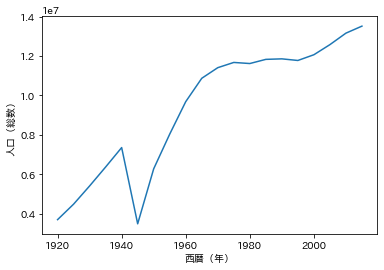

In [18]:
plt.plot(x, y)
plt.xlabel('西暦（年）')
plt.ylabel('人口（総数）')
plt.show()

X軸とY軸にラベルを追加することが出来ました。

## グラフの色変更

`plt.plot()`の引数`color`に色を指定して、グラフの色を変更します。

指定できる色はMatplotlibの公式ドキュメントから確認出来ます。

https://matplotlib.org/2.0.2/examples/color/named_colors.html

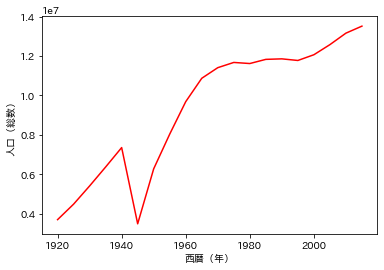

In [19]:
plt.plot(x, y, color='red')
plt.xlabel('西暦（年）')
plt.ylabel('人口（総数）')
plt.show()

グラフの色を変更することが出来ました。

**ポイント**

- 色を指定するときに「red」を「r」、「blue」を「b」のように省略して指定することが出来ます。
- カラーコード（#A8C38Bなど)で指定することも可能です。

## グラフ線の太さ変更

`plt.plot()`の引数`linewidth`に数値(pt)を指定して、グラフ線の太さを変更します。

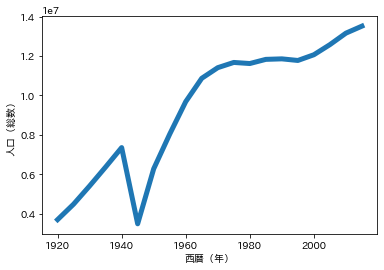

In [20]:
plt.plot(x, y, linewidth=5)
plt.xlabel('西暦（年）')
plt.ylabel('人口（総数）')
plt.show()

グラフ線の太さを変更することが出来ました。

## マーカーの付与

`plt.plot()`の引数`marker`にX軸とY軸の交わる部分の印を指定して、よりグラフを見やすくしていきます。

アルファベットの`o`を指定することでo印のマーカー、アルファベットの`x`を指定すればx印のマーカーを付与します。

その他、使用できるマーカーは公式ドキュメントから確認することが出来ます。

https://matplotlib.org/stable/api/markers_api.html

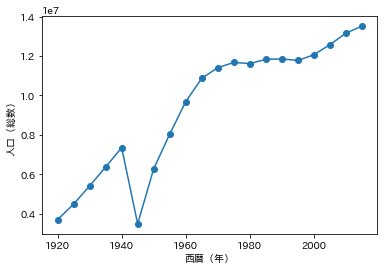

In [23]:
plt.plot(x, y, marker="o")
plt.xlabel('西暦（年）')
plt.ylabel('人口（総数）')
plt.show()

マーカーを付与することが出来ました。

## グラフ線のスタイル変更

`plt.plot()`の引数`linestyle`にスタイルを指定して、グラフ線のスタイルを変更します。

指定できるスタイルは公式ドキュメントから確認できます。

https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

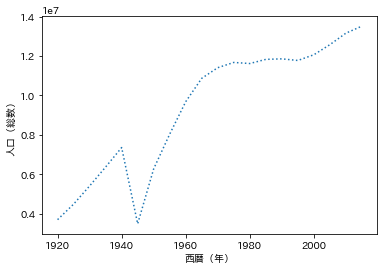

In [24]:
plt.plot(x, y, linestyle="dotted")
plt.xlabel('西暦（年）')
plt.ylabel('人口（総数）')
plt.show()

グラフ線のスタイルを変更することが出来ました。

## グラフタイトルの追加

`plt.title()`の引数にタイトルを指定することで、グラフタイトルを表示することが出来ます。

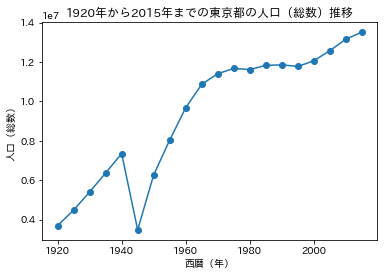

In [25]:
plt.plot(x, y, marker="o")
plt.xlabel('西暦（年）')
plt.ylabel('人口（総数）')
plt.title('1920年から2015年までの東京都の人口（総数）推移')
plt.show()

## グラフの大きさ変更

`plt.figure()`の引数`figsize`に幅と高さを指定することで、グラフの大きさを変更することが出来ます。

数値はインチ単位で画像の「幅」と「高さ」を指定します。

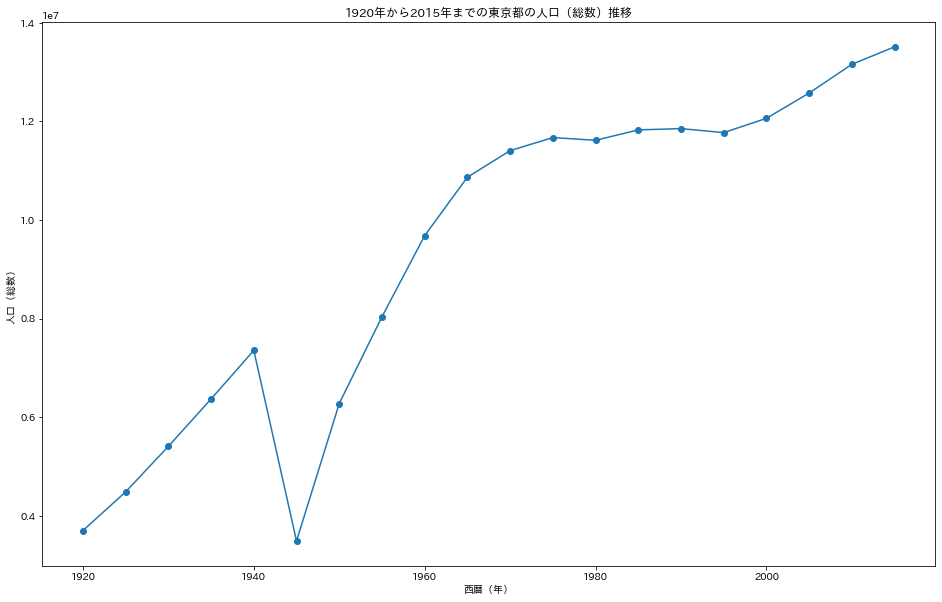

In [33]:
plt.figure(figsize=(16,10))
plt.plot(x, y, marker="o")
plt.xlabel('西暦（年）')
plt.ylabel('人口（総数）')
plt.title('1920年から2015年までの東京都の人口（総数）推移')
plt.show()

## 複数のグラフを表示

`plt.plot()`のX軸は変えずに、Y軸のデータを指定することで複数のグラフを一つの図の中に作成します。

複数のグラフを表示する場合は、引数`label`でそれぞれがどのデータを示しているのかを分かりやすくしましょう。

また、`plt.legend()`で凡例表示させます。

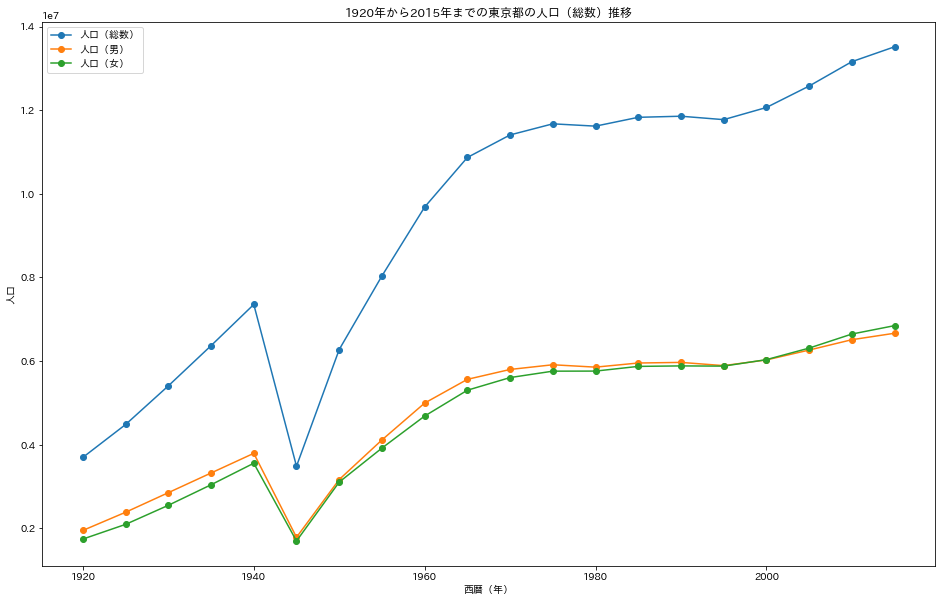

In [43]:
y2 = population_of_tokyo['人口（男）']
y3 = population_of_tokyo['人口（女）']

plt.figure(figsize=(16,10))
plt.plot(x, y, marker="o", label='人口（総数）')
plt.plot(x, y2, marker="o", label='人口（男）')
plt.plot(x, y3, marker="o", label='人口（女）')

plt.xlabel('西暦（年）')
plt.ylabel('人口')
plt.title('1920年から2015年までの東京都の人口（総数）推移')
plt.legend()
plt.show()

複数のグラフを表示することが出来ました。

## グラフを画像として保存

作成したグラフを、画像にして保存することもできます。

`plt.figure()`を変数に代入し、`savefig()`の引数に保存した名前を指定することで画像として保存します。

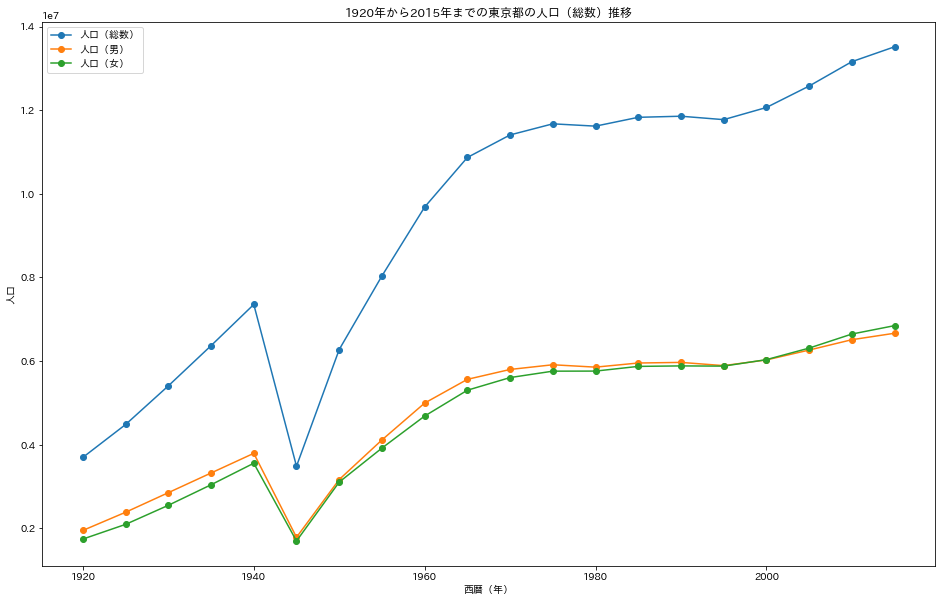

In [45]:
fig = plt.figure(figsize=(16,10))

plt.plot(x, y, marker="o", label='人口（総数）')
plt.plot(x, y2, marker="o", label='人口（男）')
plt.plot(x, y3, marker="o", label='人口（女）')

plt.xlabel('西暦（年）')
plt.ylabel('人口')
plt.title('1920年から2015年までの東京都の人口（総数）推移')
plt.legend()

fig.savefig('graph.png')